# Cheferator

Cheferator nace con el propósito de apoyar a estudiantes foráneos en la preparación de comidas, proporcionando recomendaciones inteligentes de recetas basadas en los ingredientes que tienen disponibles. Este recomendador de recetas utiliza la teoría de grafos para encontrar las mejores combinaciones de ingredientes, asegurando que los usuarios puedan aprovechar al máximo lo que tienen en sus cocinas.

El cliente web de Cheferator está desarrollado con TypeScript y Next.js, ofreciendo una experiencia de usuario fluida y eficiente. Con Cheferator, los estudiantes no solo podrán explorar nuevas recetas, sino también aprender a cocinar de manera más creativa y económica.

## Características principales
- Recomendación de recetas basada en ingredientes disponibles.
- Uso de teoría de grafos para optimización de recetas.
- Interfaz de usuario intuitiva y amigable.

## Mini arquitectura del sistema
La arquitectura es compuesta por dos componentes: el cliente web y la API, el sistema se diseño para ser modular y escalable, permitiendo futuras ampliaciones y mejoras.
### Componentes principales
#### Cliente web
- **Tecnologías:** Typescript, NextJS
- **Descripción:** Proporciona la interfaz de usuario en la cual los estudiantes podran interactuar con el sistema. Desarrollado usando NextJS para ofrecer una experiencia de usuario fluida y eficiente, con TypeScript para mejorar la calidad del código mediante el uso de tipado estático. 
- **Funcionalidades clave:**
    - Entrada de ingredientes disponibles
    - Interacción dinámica con la API para obtener las recomendaciones en tiempo real
    - Visualización de las recetas recomendadas
#### API
- **Tecnologías**: Python, FastAPI
- Descripción: Puente entre el cliente web y el motor de recomendación de recetas. Recibe las solicitudes de los ingredientes disponibles, procesa esta información utilizando el grafo y su algoritmo de recomendación, y devuelve las mejores recetas disponibles.
- **Funcionalidades Clave:**
    - Recepción de datos de ingredientes desde el cliente web.
    - Procesamiento y análisis de datos para generar recomendaciones de recetas.
    - Envío de recetas recomendadas al cliente web.

<center>
    <img alt="Arquitectura" src="https://utfs.io/f/cd536b47-2176-46d7-9536-1be6d64ccf2b-5z5n9q.png">
</center>

## Grafo de Ingredientes y Recetas
El grafo (disponible en https://cheferator-api.vercel.app/) mostrado representa las conexiones entre diversos ingredientes y las recetas que se pueden preparar utilizando estos ingredientes. Cada nodo del grafo representa un ingrediente o una receta, mientras que los enlaces entre nodos indican la relación entre ingredientes y las recetas que los utilizan.



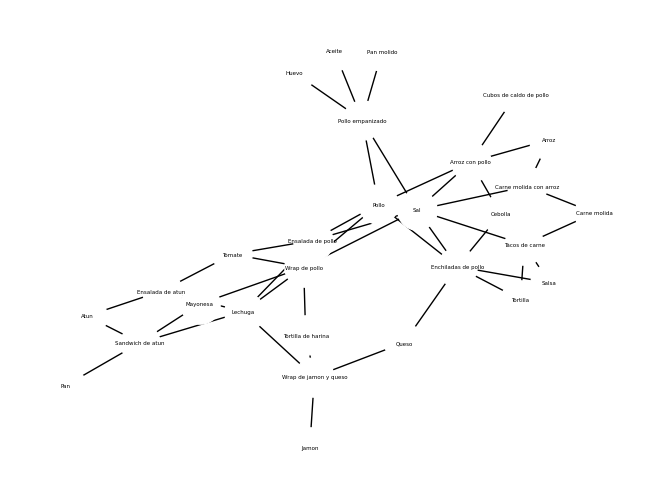

In [60]:
import sys
import networkx as nx
# Definir manualmente la ruta a la carpeta 'api'
api_folder = './api'

# Añadir la ruta de la carpeta donde está graph
sys.path.append(api_folder)

from graph import G, RenderGraphImage


nx.draw(G, node_color="white", font_color="black", node_size=800, font_size=4, with_labels=True)

### Nodos

In [61]:
for nodo in list(G.nodes):
    print(nodo)

Pan
Atun
Mayonesa
Lechuga
Pollo
Sal
Tomate
Tortilla de harina
Jamon
Queso
Tortilla
Carne molida
Cebolla
Salsa
Pan molido
Huevo
Aceite
Arroz
Cubos de caldo de pollo
Sandwich de atun
Ensalada de pollo
Wrap de jamon y queso
Ensalada de atun
Tacos de carne
Wrap de pollo
Pollo empanizado
Carne molida con arroz
Arroz con pollo
Enchiladas de pollo


### Relaciones:

In [62]:
for relacion in list(G.edges):
    print(relacion)

('Pan', 'Sandwich de atun')
('Atun', 'Sandwich de atun')
('Atun', 'Ensalada de atun')
('Mayonesa', 'Sandwich de atun')
('Mayonesa', 'Ensalada de atun')
('Mayonesa', 'Wrap de pollo')
('Lechuga', 'Sandwich de atun')
('Lechuga', 'Ensalada de pollo')
('Lechuga', 'Wrap de jamon y queso')
('Lechuga', 'Ensalada de atun')
('Lechuga', 'Wrap de pollo')
('Pollo', 'Ensalada de pollo')
('Pollo', 'Wrap de pollo')
('Pollo', 'Pollo empanizado')
('Pollo', 'Arroz con pollo')
('Pollo', 'Enchiladas de pollo')
('Sal', 'Ensalada de pollo')
('Sal', 'Tacos de carne')
('Sal', 'Wrap de pollo')
('Sal', 'Pollo empanizado')
('Sal', 'Carne molida con arroz')
('Sal', 'Arroz con pollo')
('Sal', 'Enchiladas de pollo')
('Tomate', 'Ensalada de pollo')
('Tomate', 'Ensalada de atun')
('Tomate', 'Wrap de pollo')
('Tortilla de harina', 'Wrap de jamon y queso')
('Tortilla de harina', 'Wrap de pollo')
('Jamon', 'Wrap de jamon y queso')
('Queso', 'Wrap de jamon y queso')
('Queso', 'Enchiladas de pollo')
('Tortilla', 'Tacos de 

### Grados: 

In [63]:
list(G.degree())

[('Pan', 1),
 ('Atun', 2),
 ('Mayonesa', 3),
 ('Lechuga', 5),
 ('Pollo', 5),
 ('Sal', 7),
 ('Tomate', 3),
 ('Tortilla de harina', 2),
 ('Jamon', 1),
 ('Queso', 2),
 ('Tortilla', 2),
 ('Carne molida', 2),
 ('Cebolla', 4),
 ('Salsa', 2),
 ('Pan molido', 1),
 ('Huevo', 1),
 ('Aceite', 1),
 ('Arroz', 2),
 ('Cubos de caldo de pollo', 1),
 ('Sandwich de atun', 4),
 ('Ensalada de pollo', 4),
 ('Wrap de jamon y queso', 4),
 ('Ensalada de atun', 4),
 ('Tacos de carne', 5),
 ('Wrap de pollo', 6),
 ('Pollo empanizado', 5),
 ('Carne molida con arroz', 4),
 ('Arroz con pollo', 5),
 ('Enchiladas de pollo', 6)]

### Excentricidades:

In [67]:
dict(nx.eccentricity(G))

6


### ¿Cómo trabaja en cheferator?
- Entrada de Ingredientes: Los usuarios ingresan los ingredientes que tienen disponibles.
- Búsqueda en el Grafo: El sistema busca en el grafo las posibles recetas que se pueden preparar con los ingredientes proporcionados.
- Sugerencias de Recetas: El sistema sugiere recetas basadas en la conectividad de los nodos (ingredientes) y las relaciones definidas en el grafo.